In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import iqr, zscore, skew, kurtosis

In [2]:
data=pd.read_csv("house_price.csv")
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [3]:
df=pd.DataFrame(data)

In [4]:
df=df.drop(columns="bath")

In [5]:
df.describe()

,total_sqft,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,112.276178,2.800833,7.920337e+03
std,1237.323445,149.175995,1.292843,1.067272e+05
min,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,3600.000000,43.000000,1.200000e+07


In [6]:
df.isnull().sum()

location          0
size              0
total_sqft        0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [75]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

In [7]:
df=df.drop_duplicates()

<Figure size 1000x600 with 0 Axes>

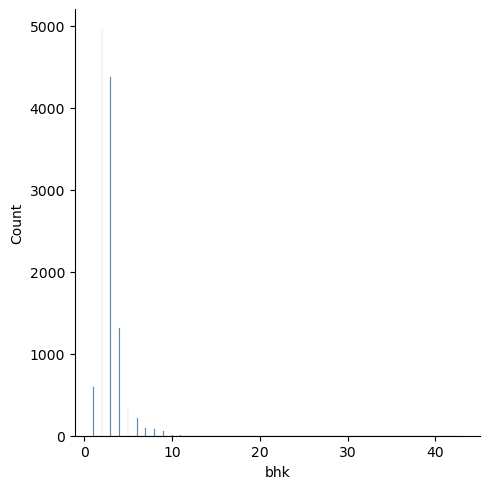

In [8]:
plt.figure(figsize=(10, 6))
sns.displot(df['bhk'])

<Axes: ylabel='bhk'>

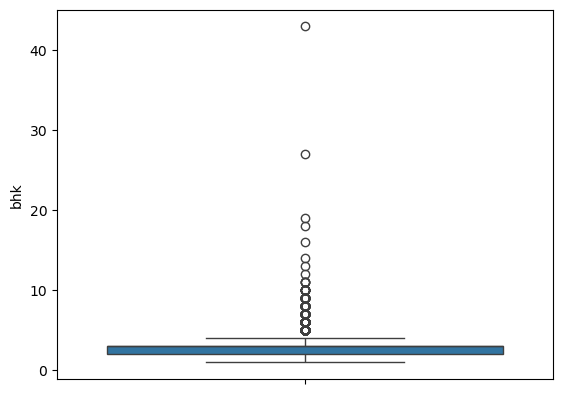

In [9]:
sns.boxplot(df, y="bhk")

Percentile Method

In [11]:
df = df.apply(pd.to_numeric, errors='coerce')

In [12]:
# def cap_outliers(df, column):
#     lower_bound = df[column].quantile(0.01)
#     upper_bound = df[column].quantile(0.99)
#     df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
#     return df

# df = cap_outliers(df, 'total_sqft')
# df = cap_outliers(df, 'price')

# print(df)

In [13]:
# up=df["bhk"].quantile(0.99)
# lp=df["bhk"].quantile(0.01)

# print("upper limit", up)
# print("lower limit", lp)

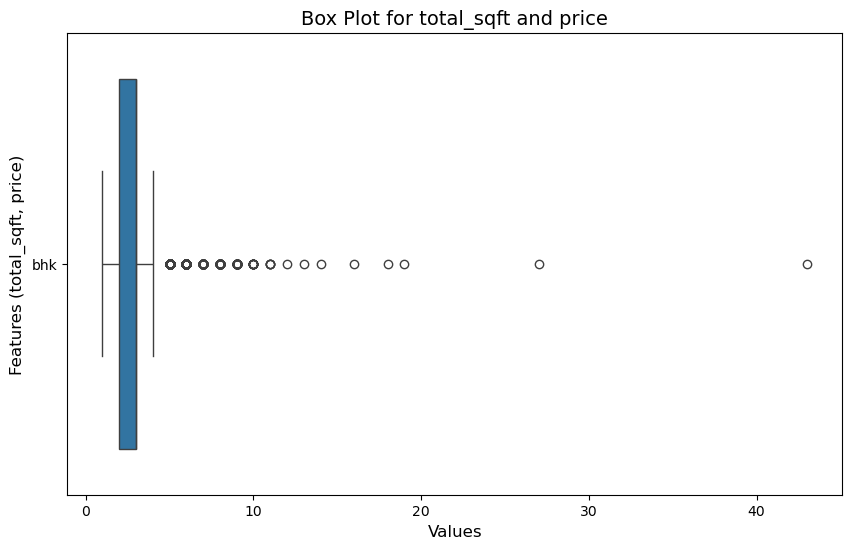

In [14]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df[['bhk']], orient='h')

# Adding title and labels
plt.title('Box Plot for total_sqft and price', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Features (total_sqft, price)', fontsize=12)

# Display the plot
plt.show()

In [15]:
df

,location,size,total_sqft,price,bhk,price_per_sqft
0,NaN,NaN,1056.0,39.07,2,3699
1,NaN,NaN,2600.0,120.00,4,4615
2,NaN,NaN,1440.0,62.00,3,4305
3,NaN,NaN,1521.0,95.00,3,6245
4,NaN,NaN,1200.0,51.00,2,4250
...,...,...,...,...,...,...
13194,NaN,NaN,1715.0,112.00,3,6530
13195,NaN,NaN,3453.0,231.00,5,6689
13196,NaN,NaN,3600.0,400.00,4,11111
13197,NaN,NaN,1141.0,60.00,2,5258


In [16]:
# df = df[(df['bhk'] >= lp) & (df['bhk'] <= up)]
# df

IQR

In [18]:
# Q1 = df['bhk'].quantile(0.25)
# Q3 = df['bhk'].quantile(0.75)
# IQR = Q3 - Q1

# Q1, Q3, IQR

<Axes: ylabel='total_sqft'>

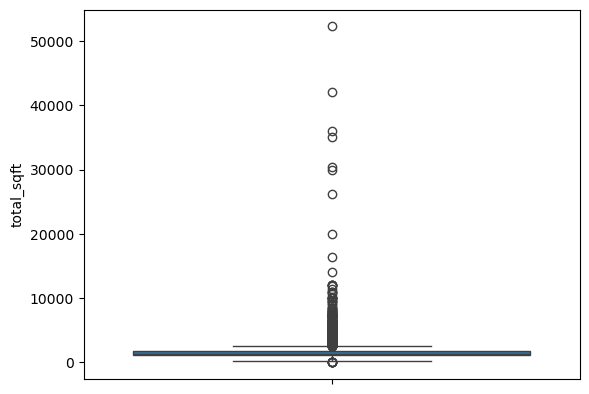

In [19]:
sns.boxplot(df['total_sqft'])

In [20]:
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# outliers = df[(df['bhk'] < lower_bound) | (df['bhk'] > upper_bound)]
# print("Outliers:")
# print(outliers)

In [21]:
# df = df[(df['bhk'] >= lower_bound) & (df['bhk'] <= upper_bound)]

<Axes: >

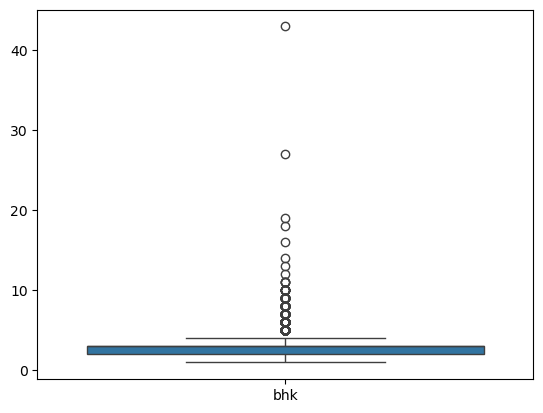

In [22]:
sns.boxplot(data=df[['bhk']])

Z SCORE

<Axes: >

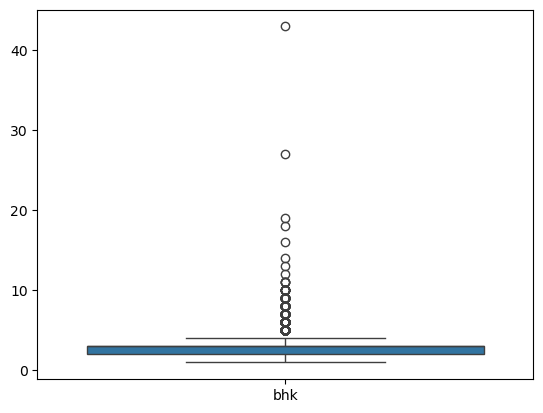

In [24]:
sns.boxplot(data=df[['bhk']])

In [25]:
#newdf=df.copy()
df['Z_score'] = (df['bhk'] -  df['bhk'].mean()) / df['bhk'].std()

threshold = 3
outliers = df[(df['Z_score'] > threshold) | (df['Z_score'] < -threshold)]

print("Outliers:")
print(outliers)

Outliers:
       location  size  total_sqft  price  bhk  price_per_sqft   Z_score
45          NaN   NaN       600.0  200.0    8           33333  3.902726
63          NaN   NaN      3000.0  140.0    8            4666  3.902726
67          NaN   NaN      1350.0   85.0    8            6296  3.902726
127         NaN   NaN       950.0  115.0    7           12105  3.148867
138         NaN   NaN      5000.0  250.0    8            5000  3.902726
...         ...   ...         ...    ...  ...             ...       ...
13079       NaN   NaN      1200.0  140.0    8           11666  3.902726
13100       NaN   NaN      1590.0  132.0    7            8301  3.148867
13102       NaN   NaN      1178.0   75.0    9            6366  4.656585
13107       NaN   NaN      6000.0  215.0    8            3583  3.902726
13157       NaN   NaN      1400.0  218.0    7           15571  3.148867

[262 rows x 7 columns]


In [26]:
df_cleaned = df[(df['Z_score'] <= threshold) & (df['Z_score'] >= -threshold)]

# Drop the Z-score column as it's no longer needed
df_cleaned = df_cleaned.drop(columns=['Z_score'])

print("Data after removing outliers:")
print(df_cleaned)

Data after removing outliers:
       location  size  total_sqft   price  bhk  price_per_sqft
0           NaN   NaN      1056.0   39.07    2            3699
1           NaN   NaN      2600.0  120.00    4            4615
2           NaN   NaN      1440.0   62.00    3            4305
3           NaN   NaN      1521.0   95.00    3            6245
4           NaN   NaN      1200.0   51.00    2            4250
...         ...   ...         ...     ...  ...             ...
13194       NaN   NaN      1715.0  112.00    3            6530
13195       NaN   NaN      3453.0  231.00    5            6689
13196       NaN   NaN      3600.0  400.00    4           11111
13197       NaN   NaN      1141.0   60.00    2            5258
13198       NaN   NaN      4689.0  488.00    4           10407

[11789 rows x 6 columns]


<Axes: >

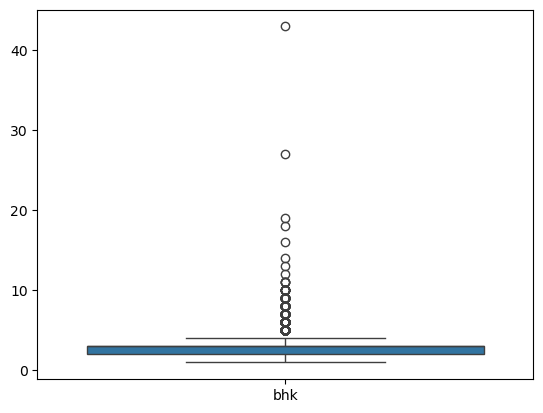

In [27]:
sns.boxplot(data=df[['bhk']])

In [28]:
def cap_outliers(df, column):
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

df = cap_outliers(df, 'bhk')
print(df)

       location  size  total_sqft   price  bhk  price_per_sqft   Z_score
0           NaN   NaN      1056.0   39.07    2            3699 -0.620428
1           NaN   NaN      2600.0  120.00    4            4615  0.887290
2           NaN   NaN      1440.0   62.00    3            4305  0.133431
3           NaN   NaN      1521.0   95.00    3            6245  0.133431
4           NaN   NaN      1200.0   51.00    2            4250 -0.620428
...         ...   ...         ...     ...  ...             ...       ...
13194       NaN   NaN      1715.0  112.00    3            6530  0.133431
13195       NaN   NaN      3453.0  231.00    5            6689  1.641149
13196       NaN   NaN      3600.0  400.00    4           11111  0.887290
13197       NaN   NaN      1141.0   60.00    2            5258 -0.620428
13198       NaN   NaN      4689.0  488.00    4           10407  0.887290

[12051 rows x 7 columns]


<Axes: >

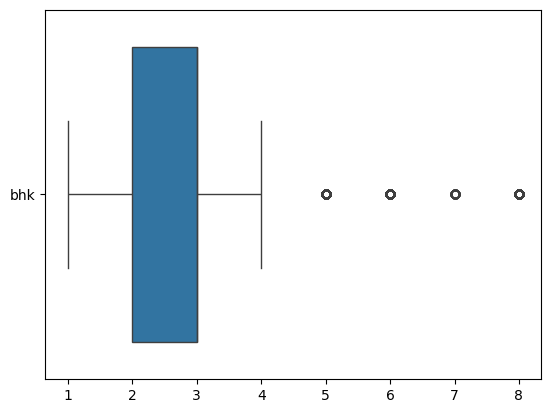

In [29]:
sns.boxplot(data=df[['bhk']], orient='h')

Z SCORE method seems to work better

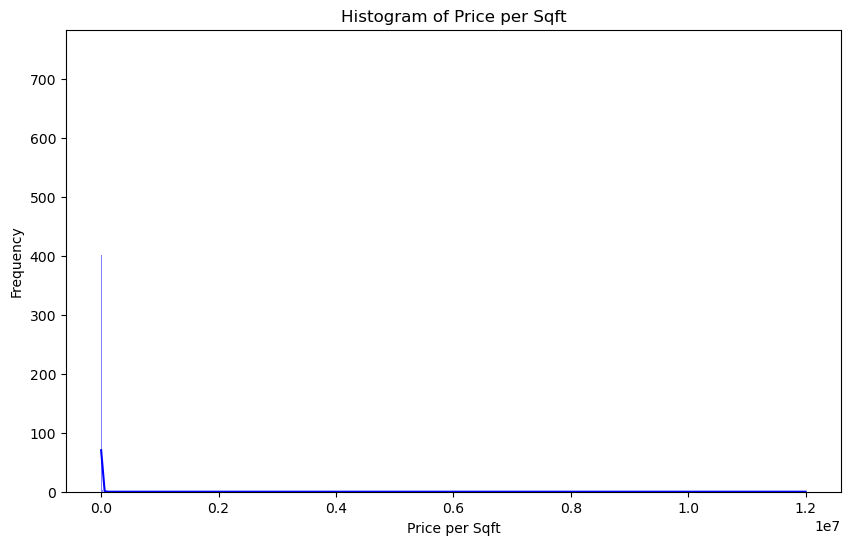

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True, color='blue')
plt.title('Histogram of Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()

In [63]:
skewness_before = skew(data['price_per_sqft'])
kurtosis_before = kurtosis(data['price_per_sqft'])

print(f"Skewness before transformation: {skewness_before}")
print(f"Kurtosis before transformation: {kurtosis_before}")

Skewness before transformation: 108.26875024325159
Kurtosis before transformation: 12090.633538860382


In [65]:
df['price_per_sqft_log'] = np.log(data['price_per_sqft'])

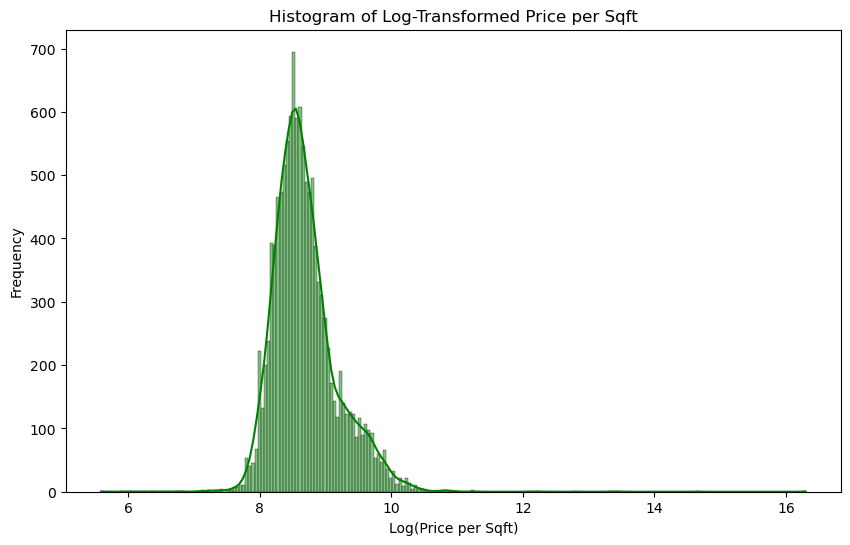

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft_log'], kde=True, color='green')
plt.title('Histogram of Log-Transformed Price per Sqft')
plt.xlabel('Log(Price per Sqft)')
plt.ylabel('Frequency')
plt.show()

In [73]:
skewness_after = skew(df['price_per_sqft_log'])
kurtosis_after = kurtosis(df['price_per_sqft_log'])

print(f"Skewness after transformation: {skewness_after}")
print(f"Kurtosis after transformation: {kurtosis_after}")

Skewness after transformation: 1.4112651776448184
Kurtosis after transformation: 9.52601711401606


In [77]:
correlation_matrix = numerical_columns.corr()

print(correlation_matrix)

                    location  size  total_sqft     price       bhk  \
location                 NaN   NaN         NaN       NaN       NaN   
size                     NaN   NaN         NaN       NaN       NaN   
total_sqft               NaN   NaN    1.000000  0.571744  0.358724   
price                    NaN   NaN    0.571744  1.000000  0.411277   
bhk                      NaN   NaN    0.358724  0.411277  1.000000   
price_per_sqft           NaN   NaN   -0.008892  0.027337  0.032822   
Z_score                  NaN   NaN    0.341483  0.390518  0.950937   
price_per_sqft_log       NaN   NaN    0.100524  0.582113  0.432032   

                    price_per_sqft   Z_score  price_per_sqft_log  
location                       NaN       NaN                 NaN  
size                           NaN       NaN                 NaN  
total_sqft               -0.008892  0.341483            0.100524  
price                     0.027337  0.390518            0.582113  
bhk                       0.032822

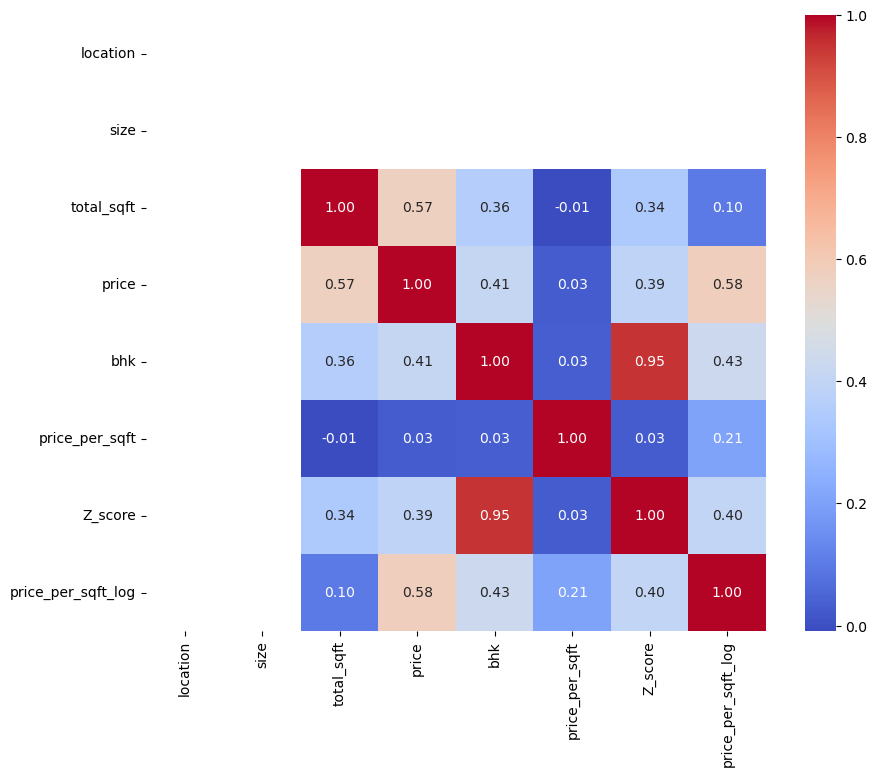

In [79]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

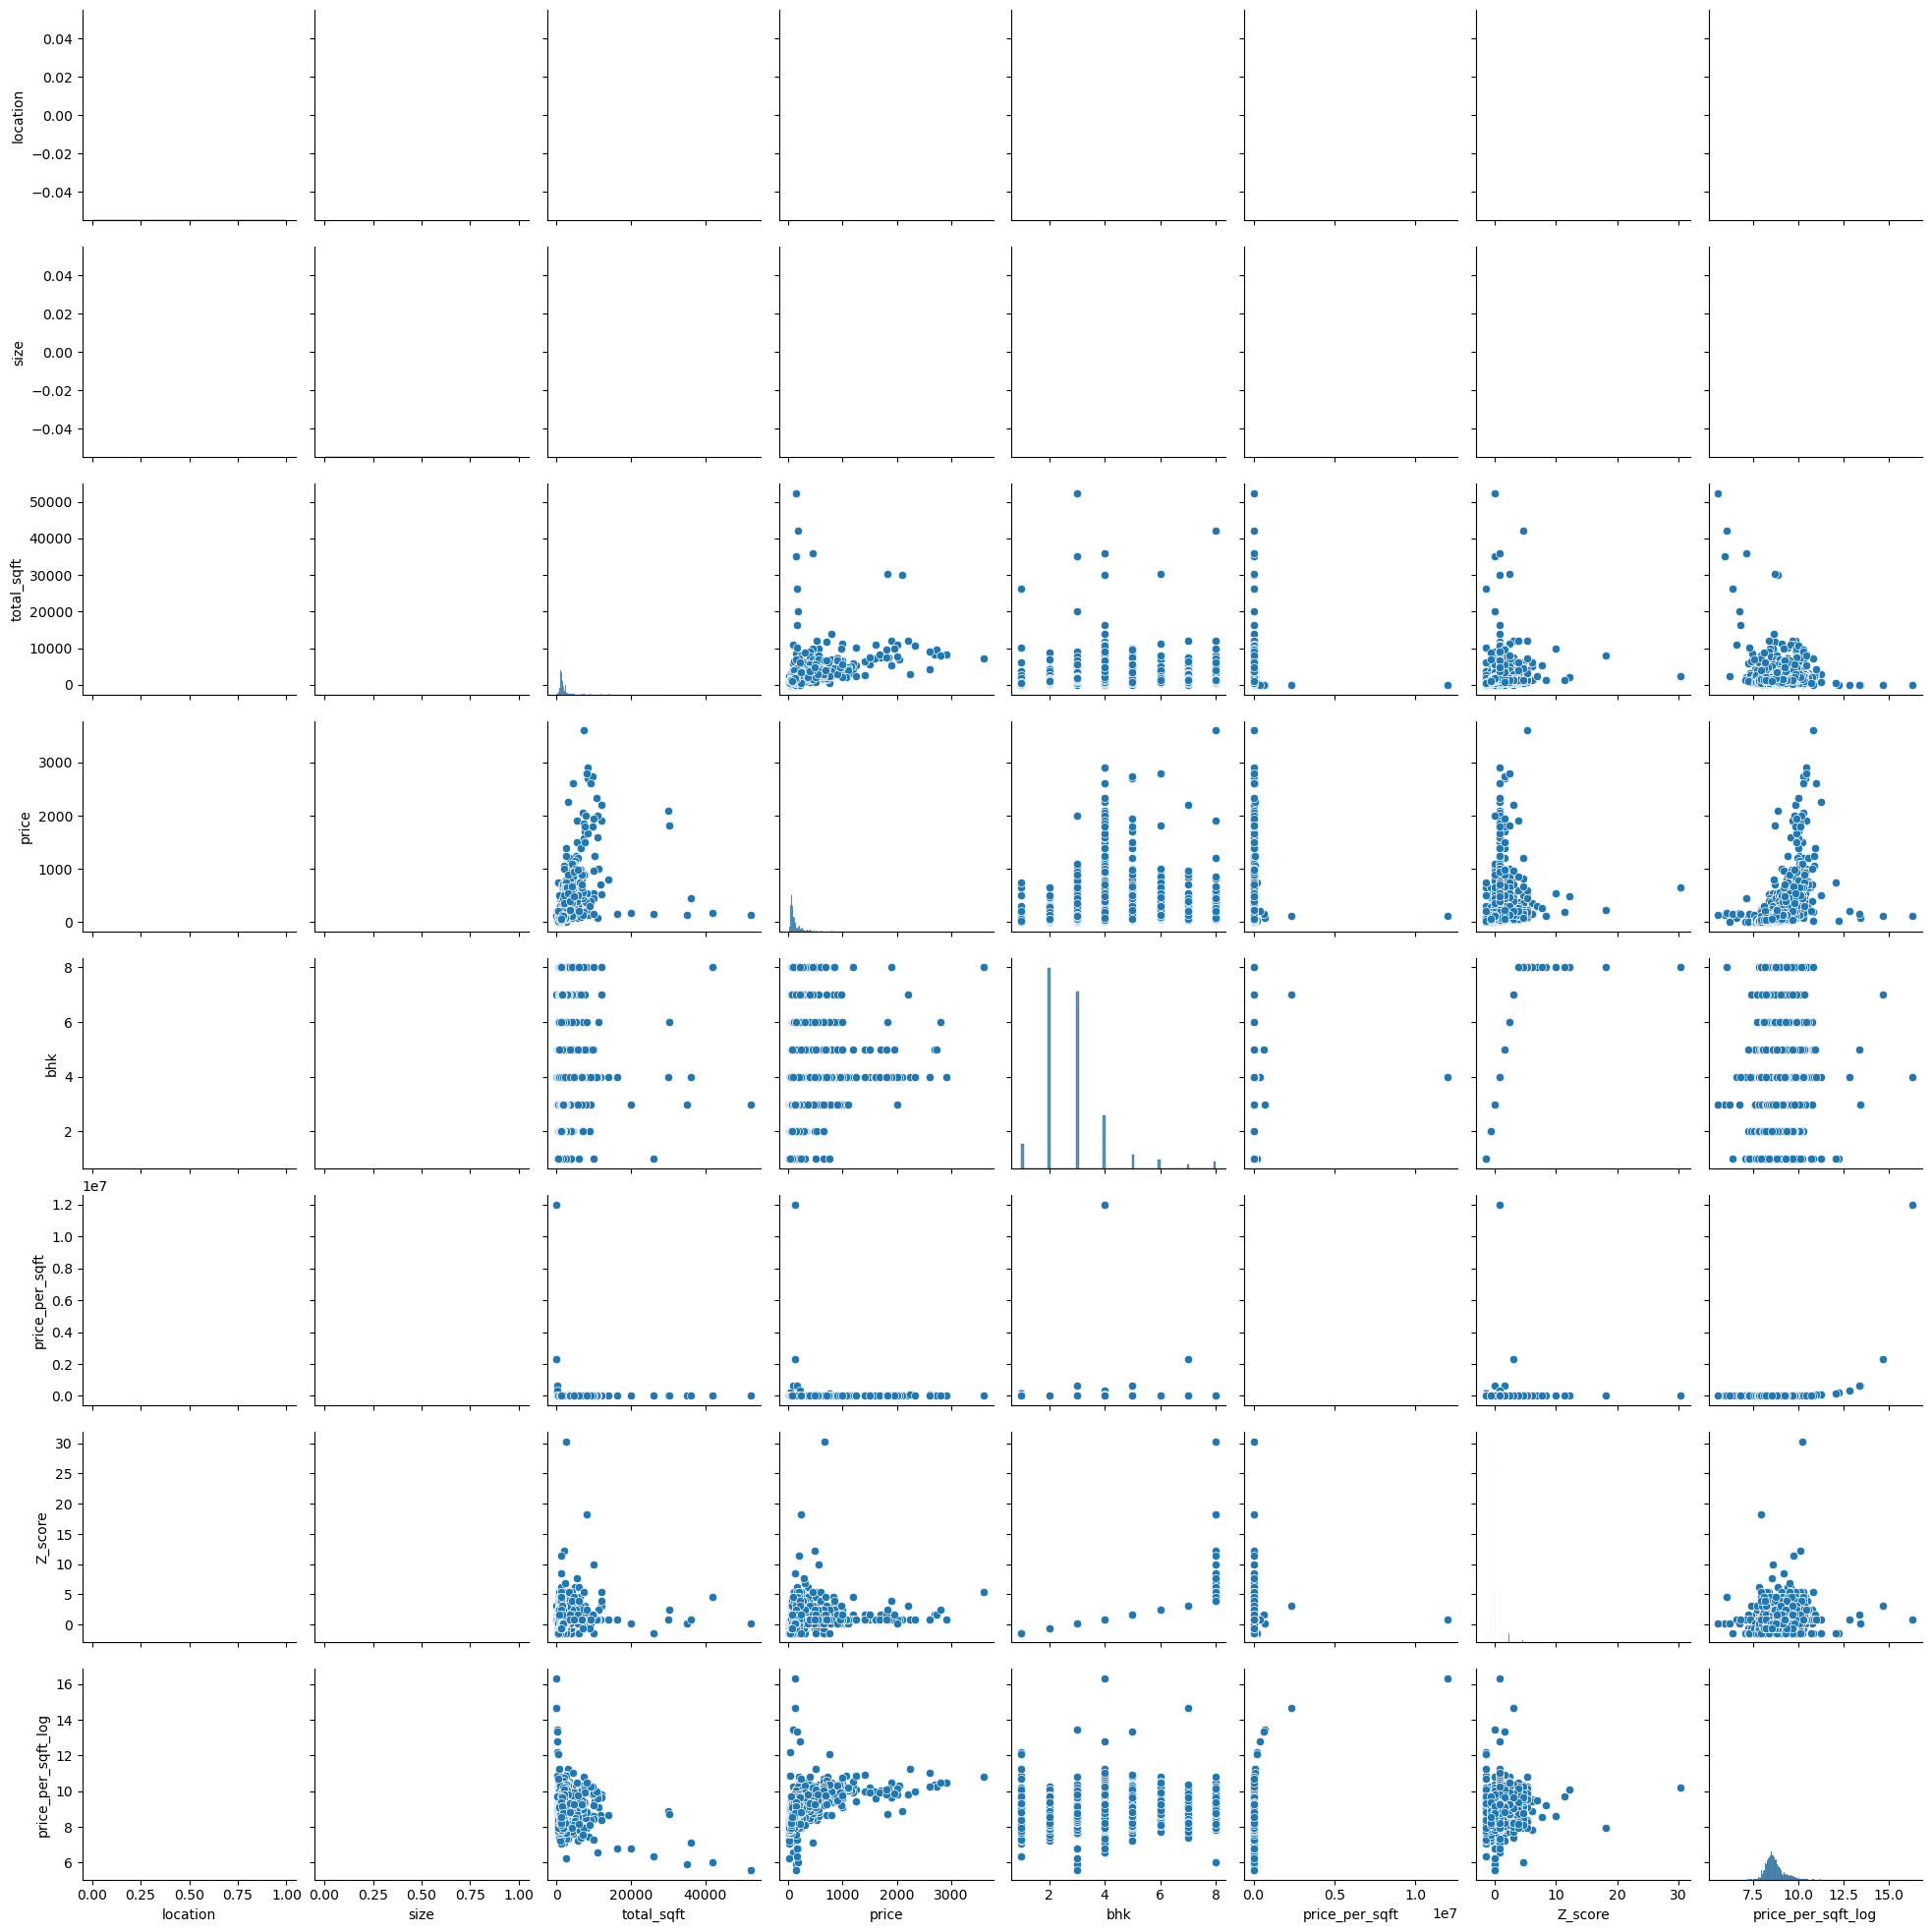

In [81]:
sns.pairplot(numerical_columns)
plt.show()

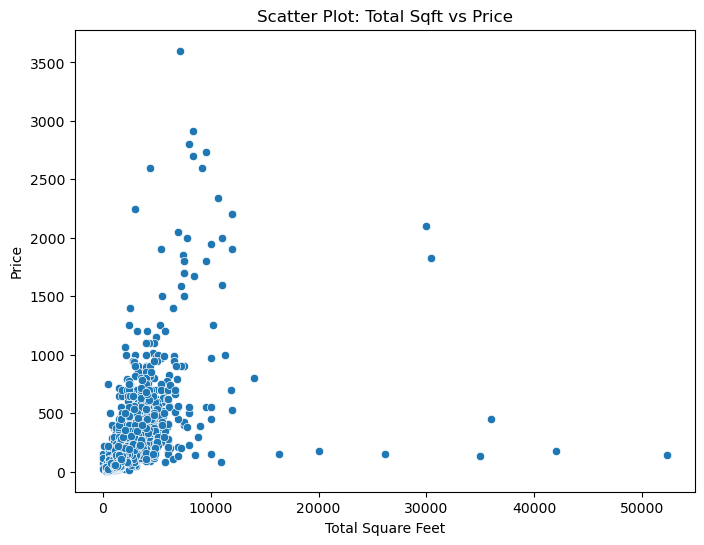

In [83]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title('Scatter Plot: Total Sqft vs Price')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.show()

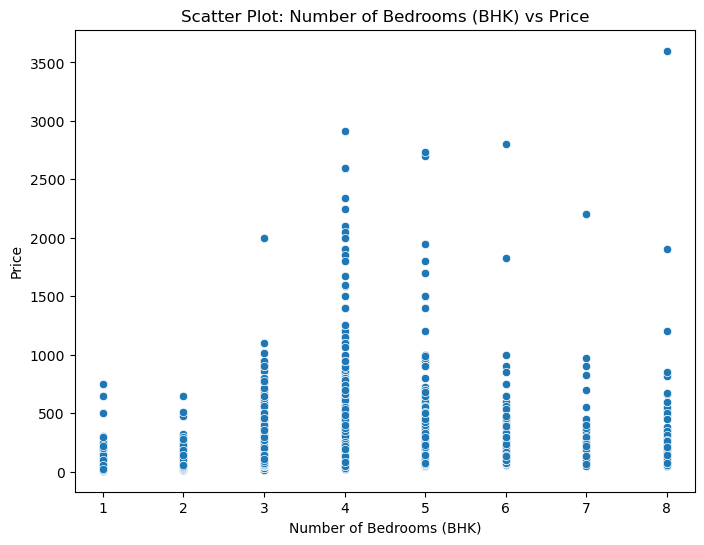

In [85]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bhk', y='price', data=df)
plt.title('Scatter Plot: Number of Bedrooms (BHK) vs Price')
plt.xlabel('Number of Bedrooms (BHK)')
plt.ylabel('Price')
plt.show()